In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error as rmse
from data_generator import postfix, lift, liftDataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_17176\2924857757.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# N = 2000    # Number of samples
N = 1000    # Number of samples
sigma = 0.01    # Noise variance 
d = 40       # Feature dimension

In [4]:
psfx = postfix(N,d,sigma)       

unliftX = np.load("X"+psfx+".npy")
y = np.load("y"+psfx+".npy")

print("Dataset has n=%d samples, each with d=%d features," % unliftX.shape,"as well as %d labels." % y.shape[0])

Dataset has n=1000 samples, each with d=40 features, as well as 1000 labels.


In [5]:
X = np.array(liftDataset(unliftX))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print("Randomly split dataset to %d training and %d test samples" % (X_train.shape[0],X_test.shape[0]))

Randomly split dataset to 700 training and 300 test samples


In [6]:
fracSize = int(X_train.shape[0]*0.1)
training_rmse = []
test_rmse = []

for i in np.arange(0.1, 1.1, 0.1):
    fracSize = int(X_train.shape[0]*i)
    X_train_frac = X_train[0:fracSize,:]
    y_train_frac = y_train[0:fracSize]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train_frac, y_train_frac)

    rmse_train = rmse(y_train_frac,model.predict(X_train_frac))
    rmse_test = rmse(y_test,model.predict(X_test))

    training_rmse.append(rmse_train)
    test_rmse.append(rmse_test)

In [7]:
results_df = pd.DataFrame({
    'Fraction %': np.arange(10, 110, 10),
    'Training_RMSE': training_rmse,
    'Test_RMSE': test_rmse
})

results_df

,Fraction %,Training_RMSE,Test_RMSE
0,10,5.444137e-15,3.065884
1,20,5.881597e-15,2.877657
2,30,7.078535e-15,2.769140
3,40,7.893264e-15,2.556280
4,50,7.981628e-15,2.456403
5,60,8.144871e-15,2.229404
6,70,1.027938e-14,2.093533
7,80,9.221776e-15,1.948045
8,90,9.201269e-15,1.676463
9,100,9.943937e-15,1.373821


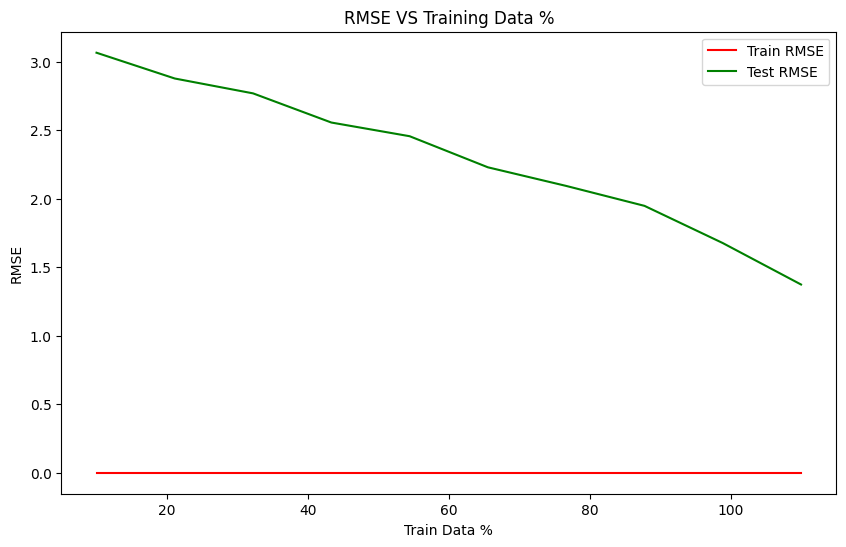

In [8]:
trainDataFraction = np.linspace(10, 110, 10)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(trainDataFraction, training_rmse, label='Train RMSE', color='red')
plt.plot(trainDataFraction, test_rmse, label='Test RMSE', color='green')

# plt.fill_between(dates[window_size - 1:], upper_band, lower_band, color='lightgray', alpha=0.4, label='Bollinger Bands')
plt.title('RMSE VS Training Data %')
plt.xlabel('Train Data %')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [9]:
for val in model.coef_:
    print(val)

1.6889233601257145
-0.8730199565520622
0.578423859079104
0.9258816268181537
0.10948833142606129
-0.0794850655438801
0.0536984551726882
-0.010273830795145197
0.021221561107738554
0.041030339879172234
0.007824792458303892
-0.03466825086560426
0.02581878804105607
0.023766043438079948
-0.04202903947515717
0.015901844335600435
-0.023523370443746527
0.040825071013076024
0.013929050674994406
-0.012418507678475382
-0.015476969801149293
-0.020686657798625885
-0.033274704130192845
0.024331008550633505
-0.01741606960570391
-0.021675665446487608
-0.056698297212259524
0.07711452322741147
-0.024563385586106868
0.03064366952833783
-0.010961377833307348
-0.04665909719516215
-0.008838555113264493
-0.03211534663950252
-0.04483863713006553
-0.0008334677296644791
0.07919414002275776
-0.08615689846314684
-0.013623409625343363
-0.0029050899565243593
0.34844703441298713
-0.01973470699891612
0.08637574503075304
-0.018489084891179883
0.07942943224705062
0.004750161112152887
-0.01214549716334401
-1.079072630860

In [10]:
model.intercept_

1.226420667767179

In [14]:
selectedCoeffs = model.coef_[np.abs(model.coef_) > 1e-1]

print("Coefficients: (Absolute Value > 0.1)")
for val in selectedCoeffs:
    print(val)

print()
print("Intercept: ", model.intercept_)

Coefficients: (Absolute Value > 0.1)
1.6889233601257145
-0.8730199565520622
0.578423859079104
0.9258816268181537
0.10948833142606129
0.34844703441298713
-1.0790726308602914
-0.6200831529155284
0.10958526458540963
0.10153609554886829
-0.10365747579094277
-0.10426078298824787
-0.11498802662007097
-0.11540863389120072
0.10305345104148461
0.10292778051820459
0.1177074278081186
0.1578863461694131
-0.11395566225700023
-0.11460005354816764
-0.10207460870006815
0.17215538955434848

Intercept:  1.226420667767179
